# **📈 AI-Powered Sales Forecasting Dashboard**

In this real-world internship project, we'll build a predictive analytics dashboard that helps retail businesses forecast their future sales. we’ll work with historical transaction data, apply machine learning models to predict upcoming trends, and present insights with an interactive Power BI dashboard.

This task blends data science, business understanding, and visualization — and is exactly the kind of project clients want in consulting, analytics, and retail SaaS.

In [1]:
# 🧹 Step 1: Import Libraries & Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload your file manually in Colab or mount from Drive
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 🧮 Step 2: Aggregate Monthly Sales
monthly_sales = (
    df.groupby(pd.Grouper(key='Order Date', freq='MS'))  # Month Start frequency
    .agg({'Sales': 'sum'})
    .reset_index()
)

monthly_sales.columns = ['ds', 'y']
monthly_sales['Month'] = monthly_sales['ds'].dt.month
monthly_sales['Year'] = monthly_sales['ds'].dt.year
monthly_sales['Holiday_Season'] = monthly_sales['Month'].isin([11, 12]).astype(int)

monthly_sales.head()


,ds,y,Month,Year,Holiday_Season
0,2014-01-01,14236.895,1,2014,0
1,2014-02-01,4519.892,2,2014,0
2,2014-03-01,55691.009,3,2014,0
3,2014-04-01,28295.345,4,2014,0
4,2014-05-01,23648.287,5,2014,0


## **📊 Visualization of Sales Trends**

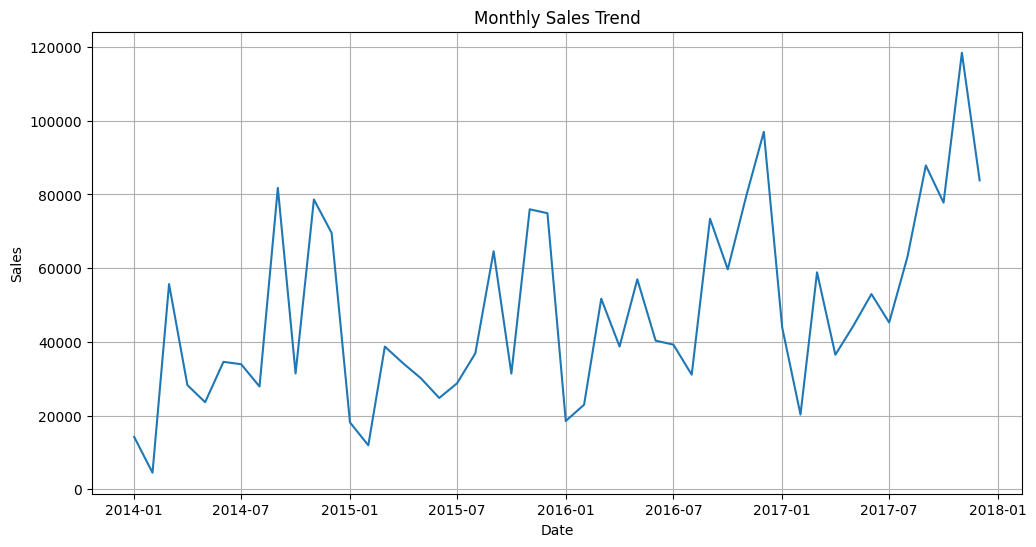

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='ds', y='y')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


# **🔮 Prophet Forecasting**

In [3]:
!pip install prophet

from prophet import Prophet

model = Prophet()
model.fit(monthly_sales[['ds', 'y']])

# Forecast for next 12 months
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7w4zez09/bzfgi0h1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7w4zez09/6zz0lri0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80752', 'data', 'file=/tmp/tmp7w4zez09/bzfgi0h1.json', 'init=/tmp/tmp7w4zez09/6zz0lri0.json', 'output', 'file=/tmp/tmp7w4zez09/prophet_modeltdnbulhs/prophet_model-20250710044853.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:48:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
55,2018-08-01,63583.293651,54357.202267,71911.871914
56,2018-09-01,100602.629937,91646.839140,109103.753822
57,2018-10-01,69219.824415,60997.846730,78180.318761
58,2018-11-01,111410.375861,103257.068721,119532.340513
59,2018-12-01,103179.031471,94670.646620,111832.652579


# **📈 Plot the Forecast**

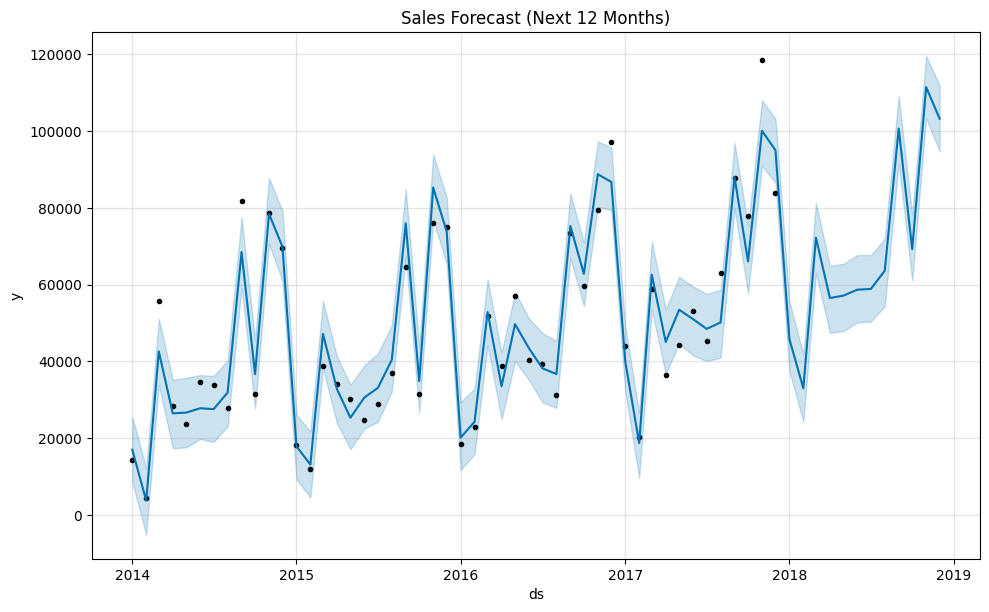

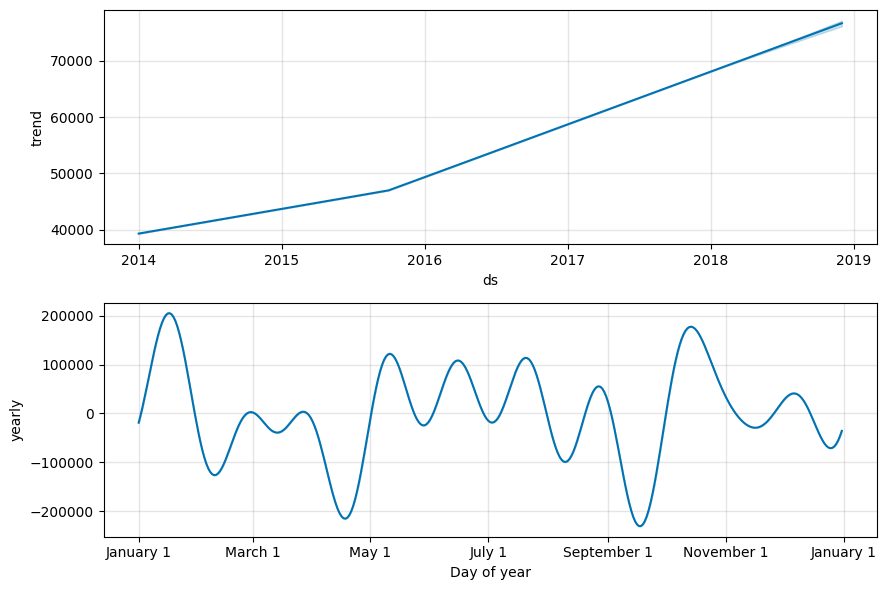

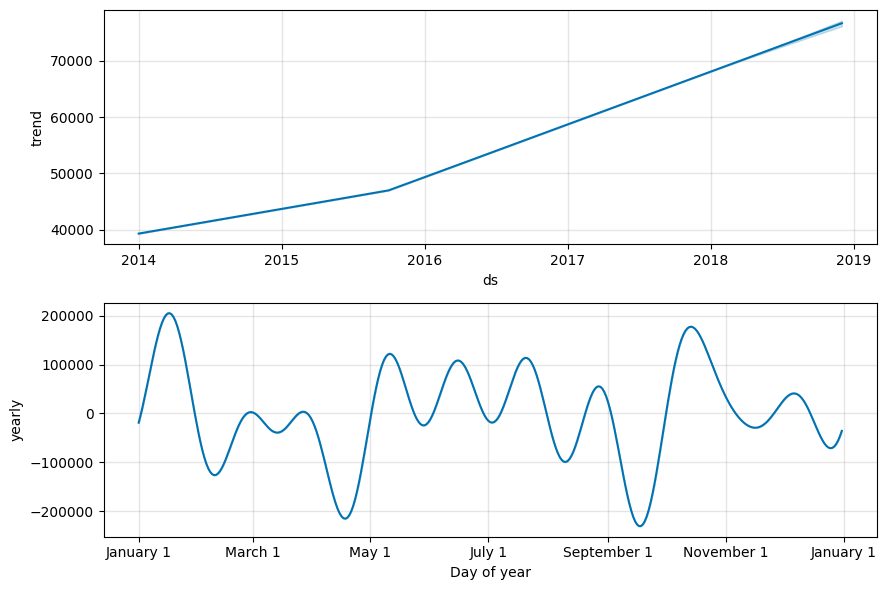

In [4]:
model.plot(forecast)
plt.title("Sales Forecast (Next 12 Months)")
plt.show()

model.plot_components(forecast)


In [5]:
forecast.to_csv('sales_forecast.csv', index=False)


In [7]:
df1= pd.read_csv('/content/sales_forecast.csv')

In [9]:
df1.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')